# Ajuste de la cantidad de parámetros de una Red Neuronal

In [1]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper

Using TensorFlow backend.


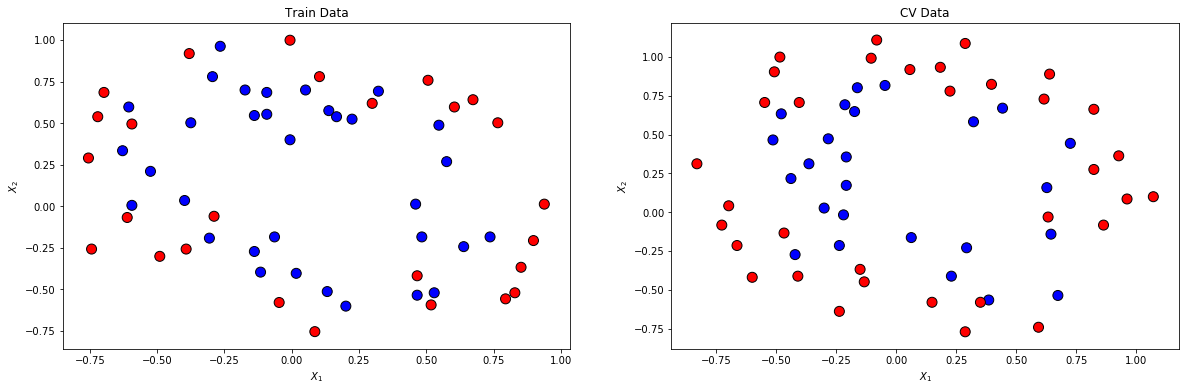

In [2]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

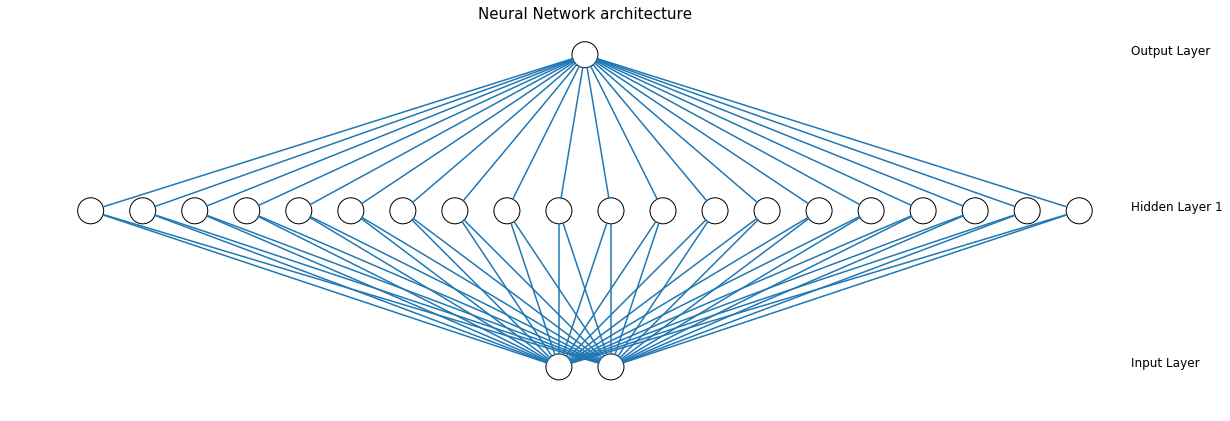

In [3]:
input_shape = 2
hidden_units = 20 # Probar con 3, 10, 20, 200
output_size = 1
network = draw_nn.DrawNN( [input_shape, hidden_units, output_size] )
network.draw()

<video controls src="./chips-mlp-20-hidden-1.mp4" width="480"/>

In [4]:
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, output_size, hidden_units=hidden_units, lr=0.1, l2_lambda=0, decay=0.0)
two_layer_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
Salida (Dense)               (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


# Entrenamiento

Probar Relu y sigmoidea y ver diferencias

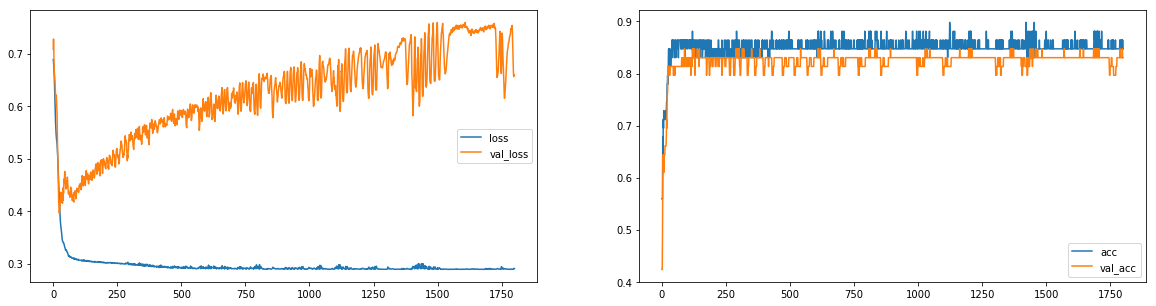

In [62]:
from fnn_helper import PlotLosses
from keras import optimizers
epochs = 2000 #adam 3000, sgd 30000
lr = 0.1
decay=0
hidden_units = 20
optim = optimizers.Adam(lr=lr) # cambiar a momentum 0.9 y lr a 5
batch_size = 59 # 10 y 59
activation='relu'

plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                 output_size, 
                                                 hidden_units=hidden_units, 
                                                 # lr=lr, 
                                                 l2_lambda=0, 
                                                 decay=decay,
                                                 optim = optim,
                                                 activation=activation
                                                )
two_layer_model.fit(X_train, 
          y_train, batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test, y_test), 
          callbacks=[plot_losses],
         )

¿Que diferencias se ven entre?
- ADAM y SGD. En cuanto a tiempos, curva de entrenamiento (monotona decreciente?)
- mini-batch size?
- con el decay?

In [63]:
# Para calcular norma en cada epoch
def get_weights_array(ws):
    weights_norm = []
    for weights in ws:
        weights_norm.append(np.linalg.norm(weights[0]))
    return weights_norm

59/59 [==============================] - 0s 44us/step


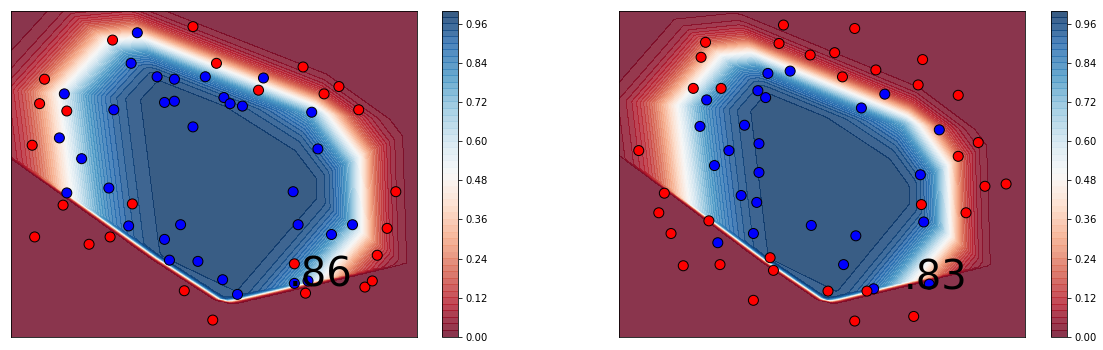

In [64]:
# two_layer_model.load_weights('SGD-3000-epochs-20-hu.hdf5')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
plt.show()

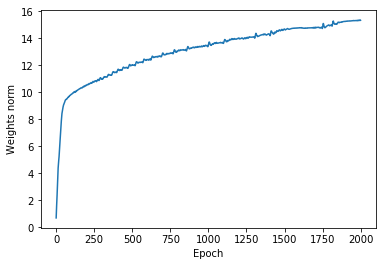

In [65]:
plt.plot(RHelper.get_weights_array(plot_losses.weights))
plt.xlabel('Epoch')
plt.ylabel('Weights norm')
plt.show()

# Diferencias fundamentales con Regresión logística
- No hay garantía de converger al mínimo absoluto
- Cada corrida puede dar resultados diferentes debido a la inicialización
- La función de activación tiene gran influencia en el resultado del modelo obtenido

# Busqueda de cantidad de parámetros

Correr varias veces y cambiar relu por sigmoidea

cantidad de unidades ocultas: 2, función de activación: relu


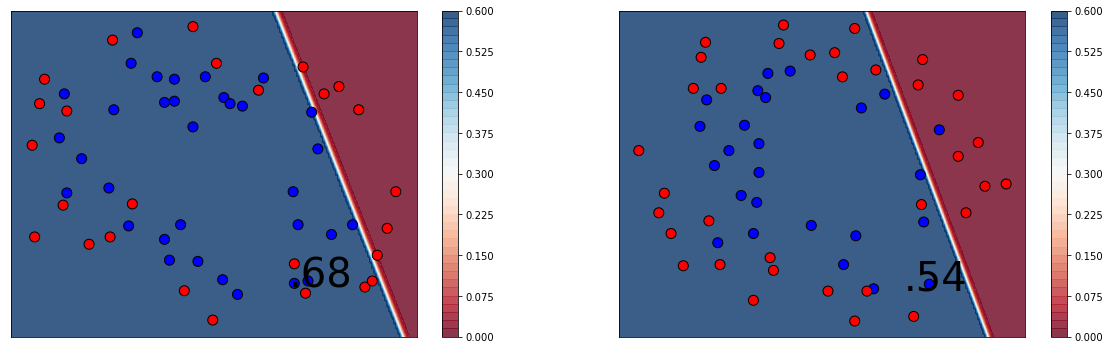

cantidad de unidades ocultas: 3, función de activación: relu


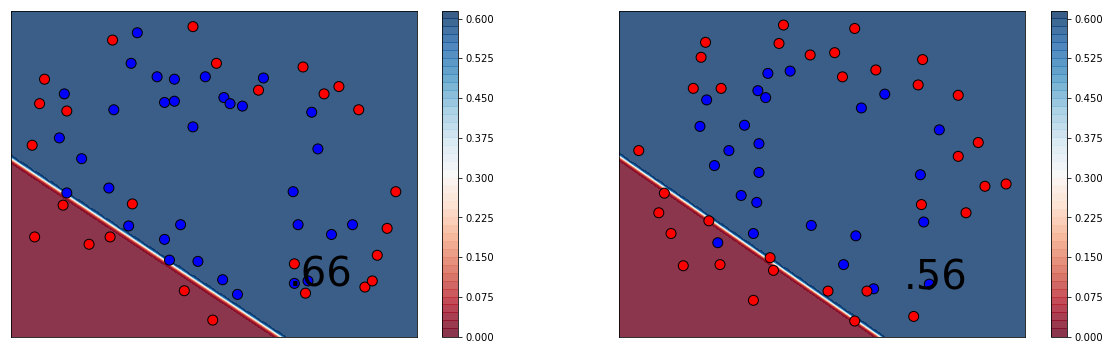

cantidad de unidades ocultas: 5, función de activación: relu


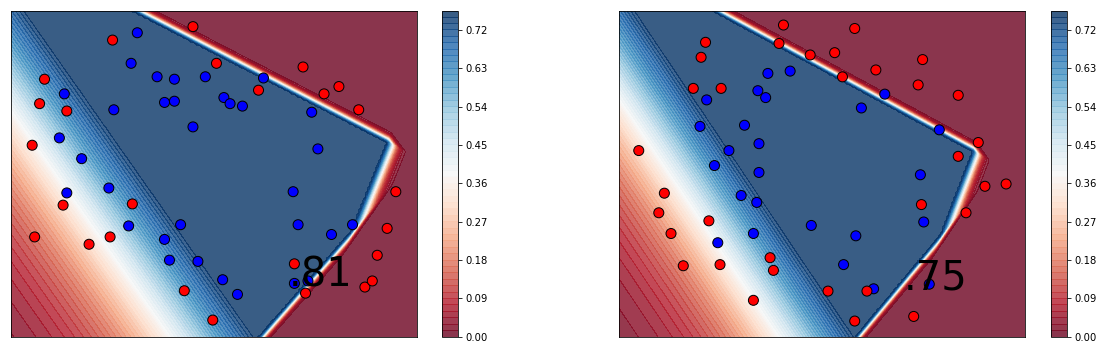

cantidad de unidades ocultas: 10, función de activación: relu


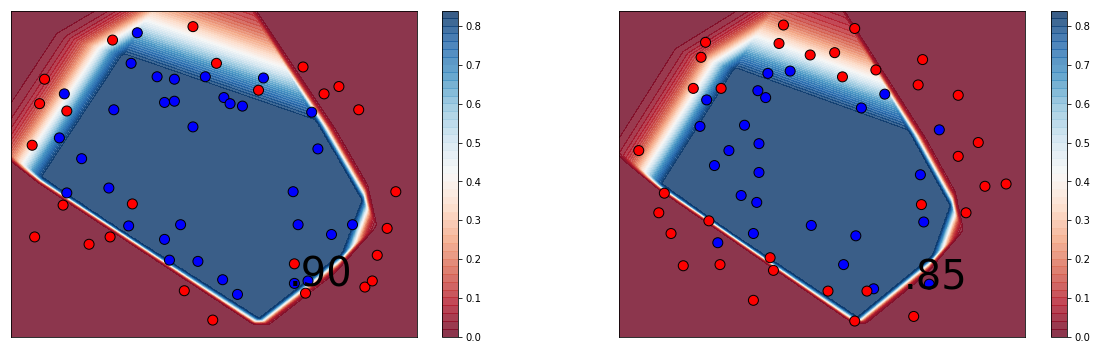

cantidad de unidades ocultas: 20, función de activación: relu


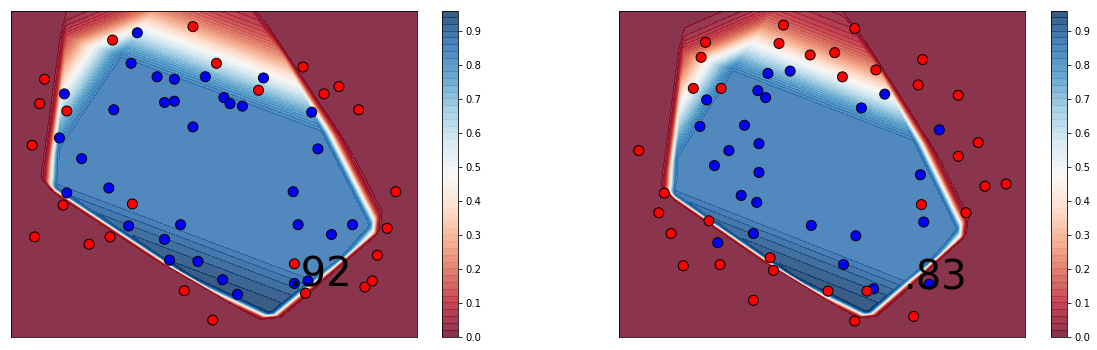

cantidad de unidades ocultas: 100, función de activación: relu


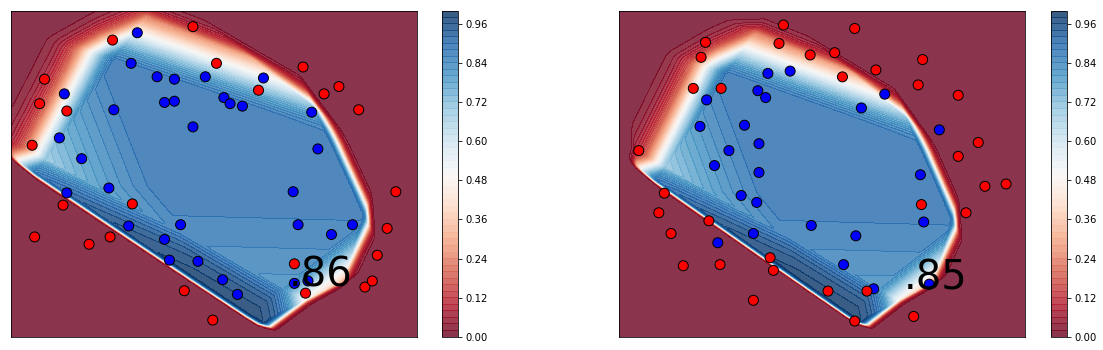

In [75]:
for hidden_units in [2, 3, 5, 10, 20, 100]:
    epochs = 2000 #adam 3000, sgd 30000
    lr = 0.1
    l2_lambda=0 #1e-3
    dropout=0.25
    decay=0
    # hidden_units = 20
    optim = optimizers.Adam(lr=lr) # cambiar a momentum 0.9 y lr a 5
    batch_size = 59 # 10 y 59
    activation='relu'

    plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
    two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                     output_size, 
                                                     hidden_units=hidden_units, 
                                                     # lr=lr, 
                                                     l2_lambda=l2_lambda, 
                                                     decay=decay,
                                                     optim = optim,
                                                     activation=activation,
                                                     dropout=dropout
                                                    )
    two_layer_model.fit(X_train, 
              y_train, batch_size = batch_size,
              epochs=epochs, 
              verbose=0, 
              validation_data=(X_test, y_test), 
              callbacks=[],
             )
    print(f'cantidad de unidades ocultas: {hidden_units}, función de activación: {activation}')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train, verbose=0)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
    RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test, verbose=0)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
    plt.show()

cantidad de unidades ocultas: 2, función de activación: sigmoid


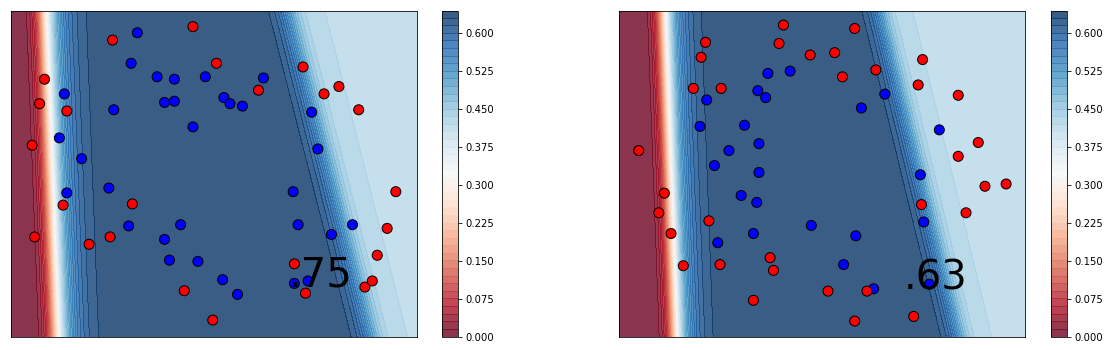

cantidad de unidades ocultas: 3, función de activación: sigmoid


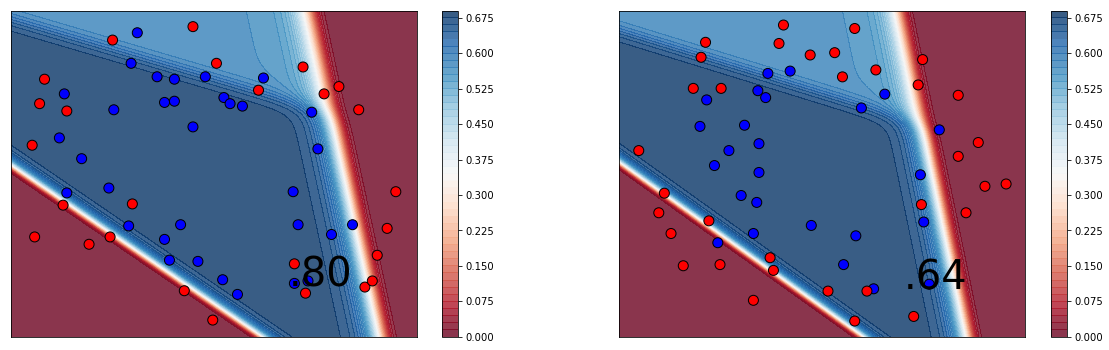

cantidad de unidades ocultas: 5, función de activación: sigmoid


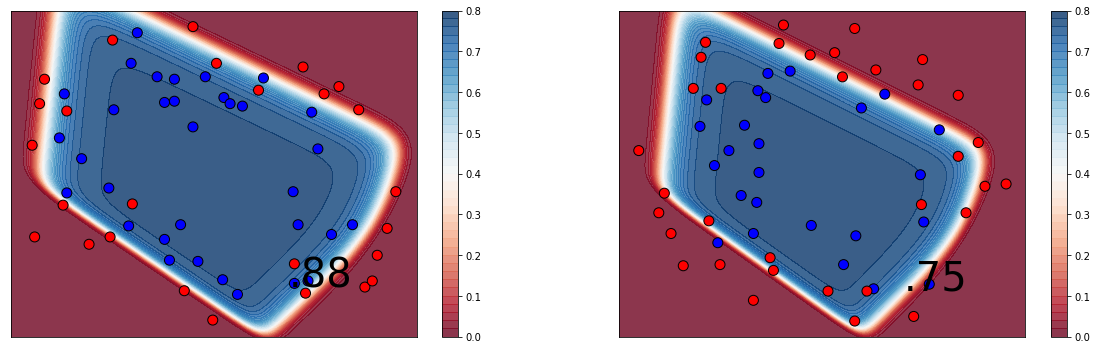

cantidad de unidades ocultas: 10, función de activación: sigmoid


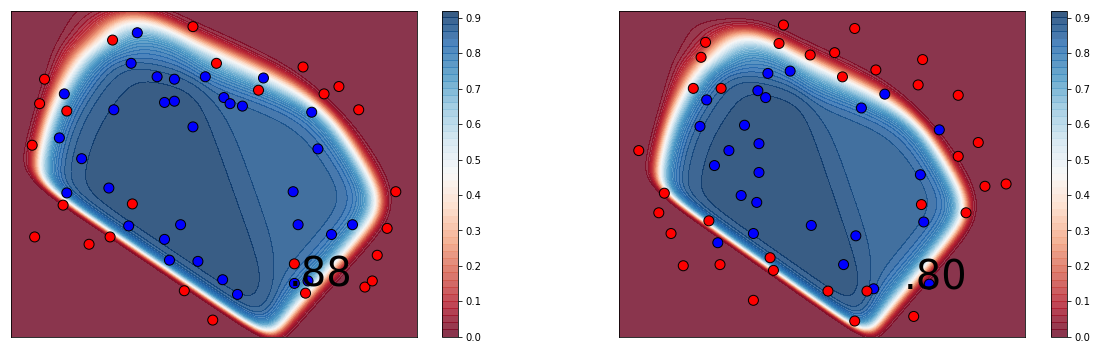

cantidad de unidades ocultas: 20, función de activación: sigmoid


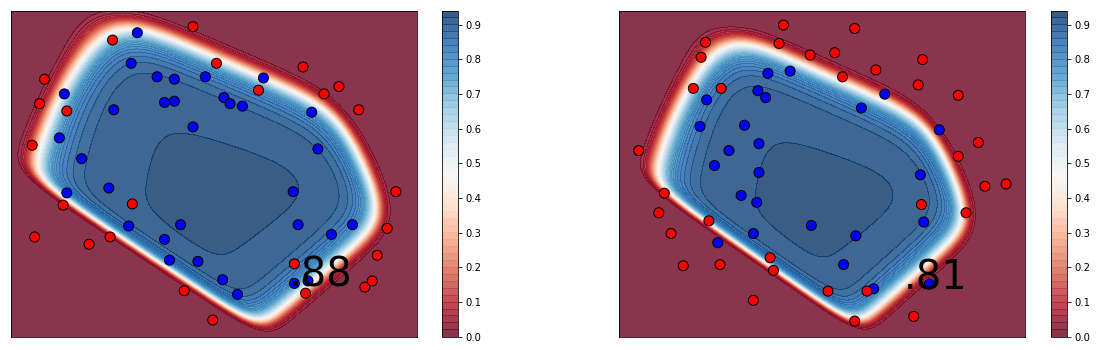

cantidad de unidades ocultas: 100, función de activación: sigmoid


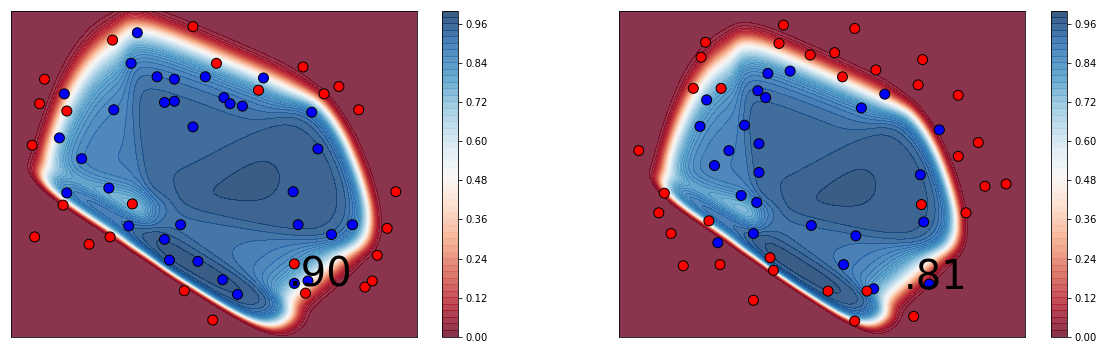

In [74]:
for hidden_units in [2, 3, 5, 10, 20, 100]:
    epochs = 2000 #adam 3000, sgd 30000
    lr = 0.1
    decay=0
    l2_lambda=0
    dropout=0.25
    # hidden_units = 20
    optim = optimizers.Adam(lr=lr) # cambiar a momentum 0.9 y lr a 5
    batch_size = 59 # 10 y 59
    activation='sigmoid'

    plot_losses = PlotLosses(plot_interval=200, evaluate_interval=None, x_val=X_test, y_val_categorical=y_test)
    two_layer_model = RHelper.get_two_layer_model_L2(input_shape, 
                                                     output_size, 
                                                     hidden_units=hidden_units, 
                                                     # lr=lr, 
                                                     l2_lambda=l2_lambda, 
                                                     decay=decay,
                                                     optim = optim,
                                                     activation=activation,
                                                     dropout=dropout
                                                    )
    two_layer_model.fit(X_train, 
              y_train, batch_size = batch_size,
              epochs=epochs, 
              verbose=0, 
              validation_data=(X_test, y_test), 
              callbacks=[],
             )
    print(f'cantidad de unidades ocultas: {hidden_units}, función de activación: {activation}')
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    RHelper.plot_boundaries_keras(X_train, y_train, two_layer_model.evaluate(X_train, y_train, verbose=0)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax1)
    RHelper.plot_boundaries_keras(X_test, y_test, two_layer_model.evaluate(X_test, y_test, verbose=0)[1], two_layer_model.predict_proba, h = 0.01, margin=0.1, ax=ax2)
    plt.show()